In [14]:
import pandas as pd
import numpy as np

In [44]:
df=pd.read_csv("/content/earthquake_data.csv")

In [16]:

df.nunique()


title        768
magnitude     24
date_time    773
cdi           10
mmi            9
alert          4
tsunami        2
sig          339
net           11
nst          312
dmin         369
gap          256
magType        9
depth        303
latitude     778
longitude    777
location     413
continent      6
country       49
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [18]:
df['cdi'].value_counts()


0    212
5    107
7     97
8     86
6     77
9     66
4     62
3     47
1     14
2     14
Name: cdi, dtype: int64

In [19]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [45]:
data=df.drop(columns=['title','date_time','net','location', 'continent', 'country','alert'])


In [47]:
data.head()


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,8,7,1,768,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,4,4,0,735,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,3,3,1,755,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,5,5,1,833,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,0,2,1,670,131,4.998,27.0,mww,624.464,-25.5948,178.278


In [48]:
data.isnull().sum()


magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   tsunami    782 non-null    int64  
 4   sig        782 non-null    int64  
 5   nst        782 non-null    int64  
 6   dmin       782 non-null    float64
 7   gap        782 non-null    float64
 8   magType    782 non-null    object 
 9   depth      782 non-null    float64
 10  latitude   782 non-null    float64
 11  longitude  782 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 73.4+ KB


In [24]:
from sklearn.preprocessing import OneHotEncoder


In [25]:
ohe=OneHotEncoder


In [50]:
ohe_df=pd.get_dummies(data,columns=['magType'])

In [51]:
ohe_df.shape


(782, 20)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

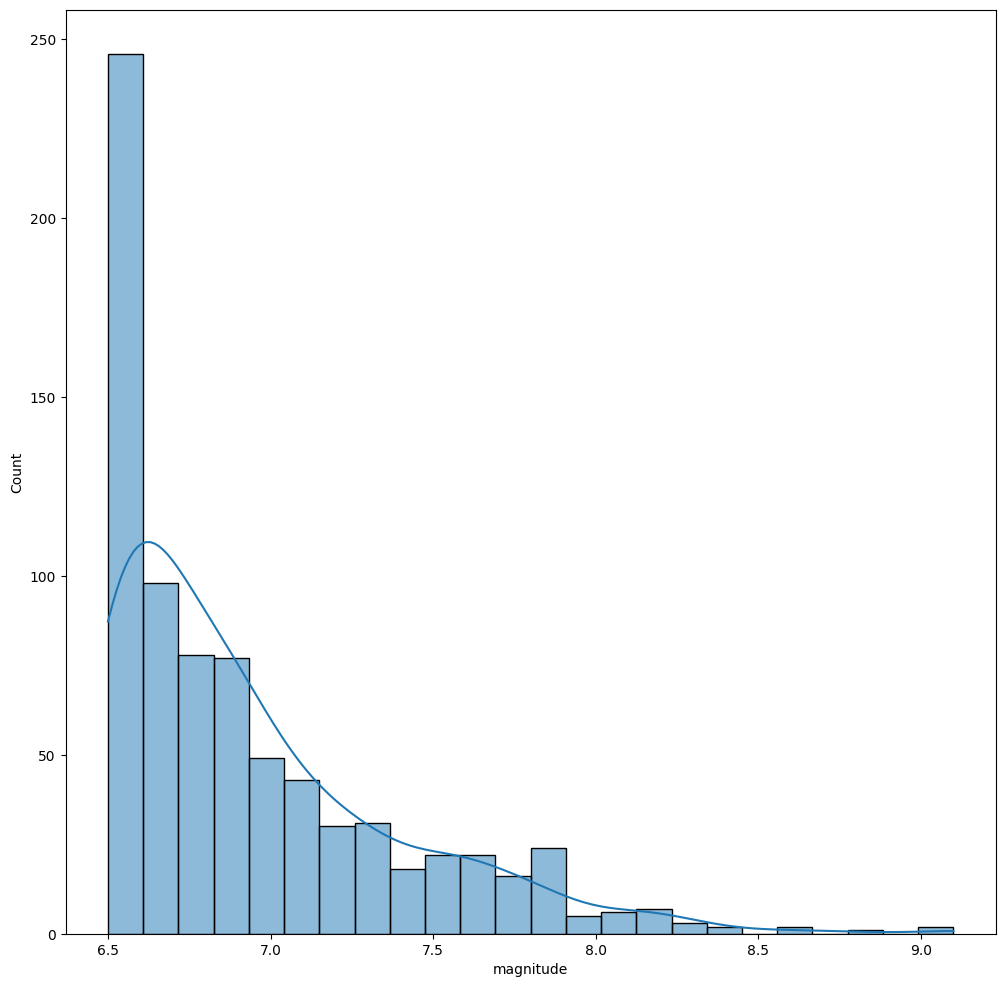

In [53]:
plt.figure(figsize=(12,12))
sns.histplot(df['magnitude'],kde=True)
plt.show()

In [30]:
import matplotlib.image as mpimg


In [31]:
img=mpimg.imread("/content/Longitude-and-Latitude-Map.webp")


In [32]:
x=df['latitude']
y=df['longitude']

Text(0.5, 1.0, 'Map of earthquakes according to the data')

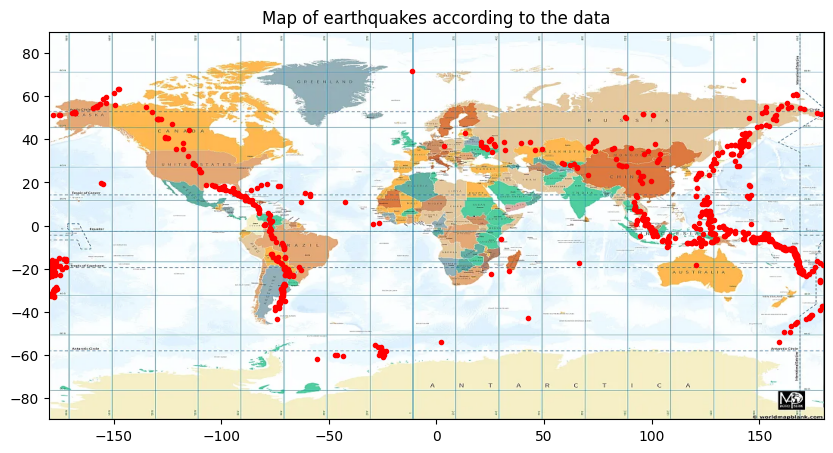

In [33]:
plt.figure(figsize=(10, 8))
plt.imshow(img, extent=[-180, 180, -90, 90])  # Set the extent to match your data range
plt.scatter(df['longitude'], df['latitude'], marker='.', color='red')
plt.title('Map of earthquakes according to the data')


In [34]:
df['tsunami'].value_counts()


0    478
1    304
Name: tsunami, dtype: int64

([<matplotlib.patches.Wedge at 0x7cbad4cf7100>,
 [Text(-0.37668353811145555, 1.033493837483241, 'Land'),
  Text(0.37668353811145516, -1.0334938374832412, 'oceans')])

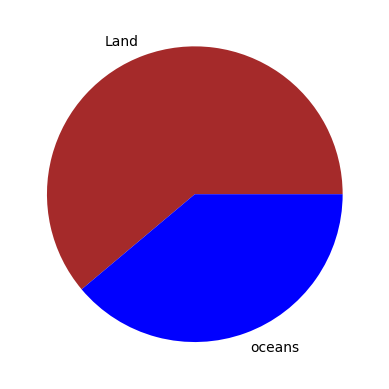

In [35]:
earth=['Land','oceans']
colors=['brown','blue']
land=[478,304]
plt.pie(land,colors=colors,labels=earth)

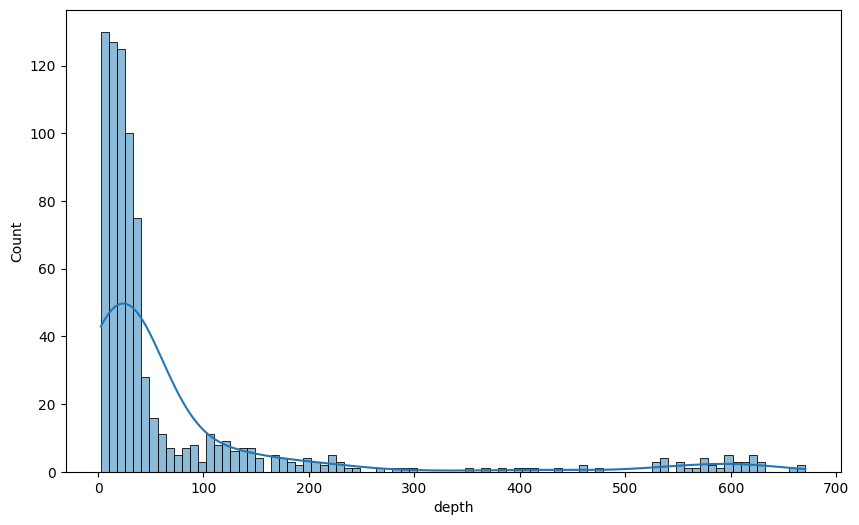

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df['depth'],kde=True)
plt.show()

In [37]:
corelation=(df['depth'].corr(df['magnitude']))
(corelation)

0.030644410229721416

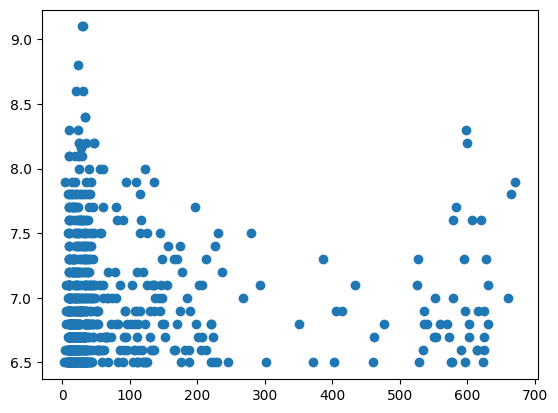

In [38]:

plt.scatter(df['depth'],df['magnitude'])
plt.show()

<ipython-input-39-8fb766fd335d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_m=df.corr()


<Axes: >

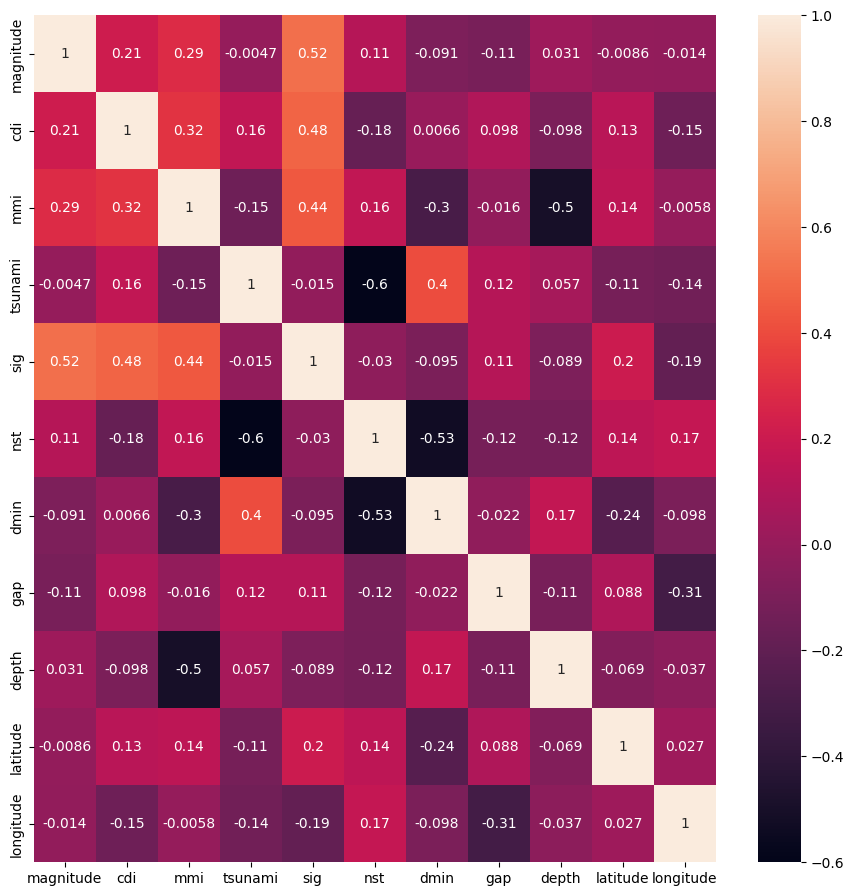

In [39]:
corelation_m=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corelation_m,annot=True)

In [40]:
from sklearn.preprocessing import StandardScaler


In [54]:
X=ohe_df.drop(columns=['magnitude'])
Y=ohe_df['magnitude']

In [55]:
ss=StandardScaler()


In [56]:
Scale_df=ss.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=10,random_state=20)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_predlr=lr.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
lr_MAE=mean_absolute_error(y_test,y_predlr)
lr_MSE=mean_squared_error(y_test,y_predlr)
lr_r2=r2_score(y_test,y_predlr)

In [66]:
print('Mean absolute error through Linear regression',lr_MAE)
print('mean squared error through Linear regression',lr_MSE)
print('r2 score through linear regression',lr_r2)

Mean absolute error through Linear regression 0.32503419465434613
mean squared error through Linear regression 0.1287420123181096
r2 score through linear regression -0.5039954710059527


In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
DTR=DecisionTreeRegressor()

In [71]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_predDTR=DTR.predict(x_test)

In [73]:
DTR_MAE=mean_absolute_error(y_test,y_predDTR)
DTR_MSE=mean_squared_error(y_test,y_predDTR)
DTR_r2=r2_score(y_test,y_predDTR)

In [74]:
print('mean absolute error through decision tree regressor',DTR_MAE)
print('mean squared error through decision tree regressor',DTR_MSE)
print('r2_score through decision tree regressor',DTR_r2)

mean absolute error through decision tree regressor 0.06000000000000103
mean squared error through decision tree regressor 0.012000000000000075
r2_score through decision tree regressor 0.8598130841121487


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
RFR=RandomForestRegressor()

In [77]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
y_predRFR=RFR.predict(x_test)

In [79]:
RFR_MAE=mean_absolute_error(y_test,y_predRFR)
RFR_MSE=mean_squared_error(y_test,y_predRFR)
RFR_r2=r2_score(y_test,y_predRFR)

In [80]:
print('mean absolute error through random forest regressor',RFR_MAE)
print('mean squared error through random forest regressor',RFR_MAE)
print('r2_score from random forest regressor',RFR_r2)

mean absolute error through random forest regressor 0.1447999999999995
mean squared error through random forest regressor 0.1447999999999995
r2_score from random forest regressor 0.5022803738317796
